This code removes rain droplets from an image by first converting the image to grayscale and applying Gaussian blur to reduce noise. It then uses Canny edge detection to identify the edges of the rain droplets, followed by dilation to enhance the edges. Contours of the droplets are detected, and small, insignificant contours are filtered out. A mask is created from the remaining contours, which is used in the inpainting process to fill in the rain droplets and reconstruct the image using the Telea inpainting method.

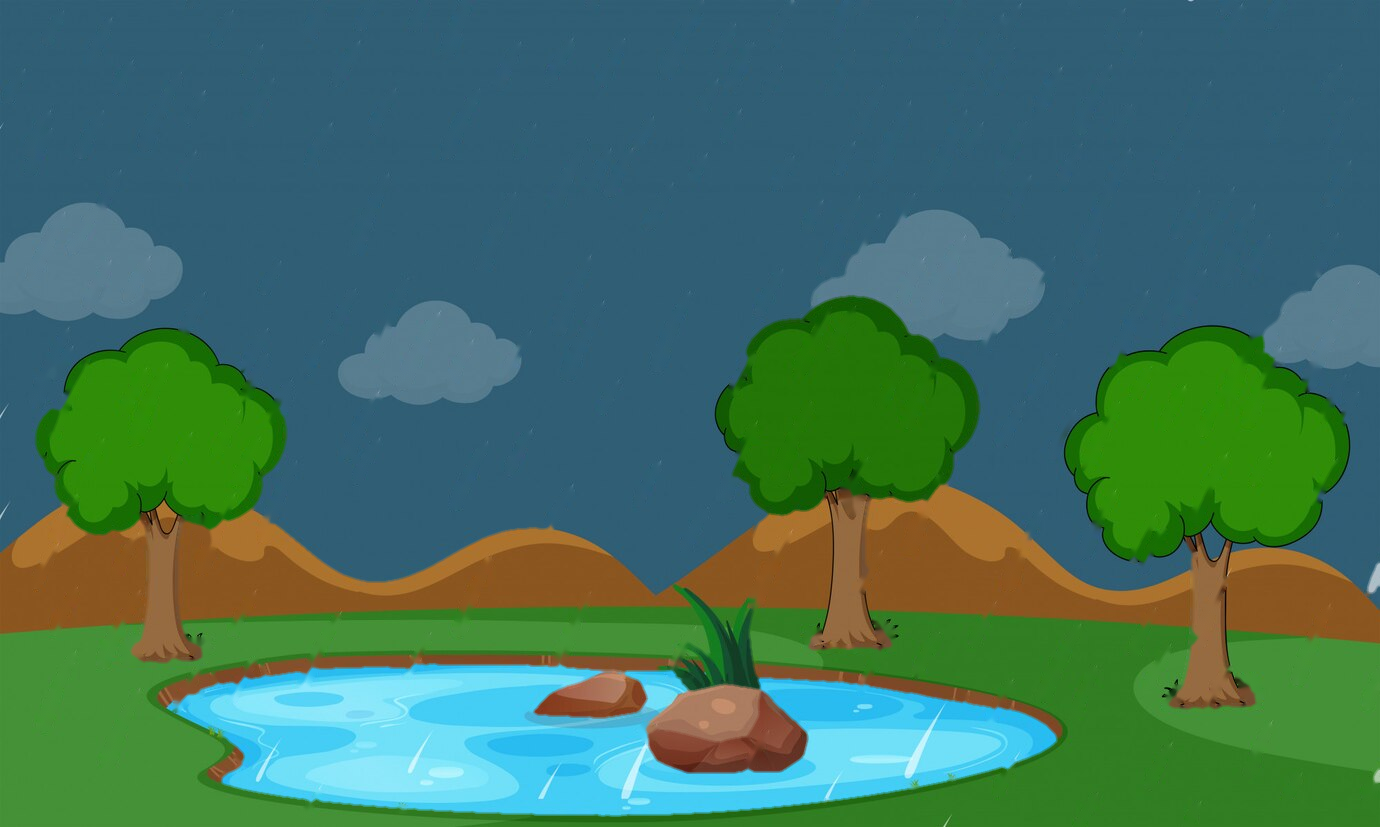

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# loaded the image
img=cv2.imread('/content/rain_image.png')

#Converted it to grayscale so that it would make it easier for
#further processing
gray_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Decreasing the noise of the image by applying a blurring technique
blurred=cv2.GaussianBlur(gray_img,(5,5),0)

edges_of_img=cv2.Canny(blurred,86,286)

kernel=np.ones((5,5),np.uint8)
dilated=cv2.dilate(edges_of_img,kernel,iterations=1)

#Identifying the rain droplets shape
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Removing the small noises in the image
min_contour_area=1
filtered_contours=[cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

#Filling the img with background
mask = np.zeros_like(gray_img)
cv2.drawContours(mask, filtered_contours, -1, (255), thickness=-1)
inpainted = cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA)

output_image = "rain_removed.jpg"
cv2.imwrite(output_image, inpainted)
cv2_imshow(inpainted)